# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
sys.path.insert(1, '..')
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poli
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | brainerd
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | havre-saint-pierre
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | deniliquin
Processing Record 17 of Set 1 | bukama
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | puerto lleras
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | porbandar
Processing Record 22 of Set 1 | fuku

Processing Record 36 of Set 4 | sao filipe
Processing Record 37 of Set 4 | lake charles
Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | kalmunai
Processing Record 40 of Set 4 | unye
City not found. Skipping...
Processing Record 41 of Set 4 | padang
Processing Record 42 of Set 4 | nabire
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | pauini
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | canutama
Processing Record 48 of Set 4 | hanyang
Processing Record 49 of Set 4 | pundaguitan
Processing Record 0 of Set 5 | puerto leguizamo
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | yuzhno-sukhokumsk
Processing Record 3 of Set 5 | pirajui
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | latung
Processing Record 6 of Set 5 | mana
Processing Record 7 of Set 5 | khor
Processing Record 8 of Set 5 | poya
Processing Record 9 of Set 5 | puerto carreno
Proc

Processing Record 25 of Set 8 | marsh harbour
Processing Record 26 of Set 8 | leningradskiy
Processing Record 27 of Set 8 | le port
Processing Record 28 of Set 8 | dukat
Processing Record 29 of Set 8 | tiarei
Processing Record 30 of Set 8 | meulaboh
Processing Record 31 of Set 8 | bud
Processing Record 32 of Set 8 | mildura
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | thinadhoo
Processing Record 35 of Set 8 | the valley
Processing Record 36 of Set 8 | agadez
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | mporokoso
Processing Record 39 of Set 8 | choctaw
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | nautanwa
Processing Record 42 of Set 8 | hastings
Processing Record 43 of Set 8 | galveston
Processing Record 44 of Set 8 | beruni
City not found. Skipping...
Processing Record 45 of Set 8 | santiago
Processing Record 46 of Set 8 | fort nelson
Processing Record 47 of Set 8 | estevan
Proce

Processing Record 15 of Set 12 | illela
Processing Record 16 of Set 12 | dong hoi
Processing Record 17 of Set 12 | riverton
Processing Record 18 of Set 12 | juruti
Processing Record 19 of Set 12 | timmins
Processing Record 20 of Set 12 | moissac
Processing Record 21 of Set 12 | wanning
Processing Record 22 of Set 12 | grants pass
Processing Record 23 of Set 12 | sabibah
City not found. Skipping...
Processing Record 24 of Set 12 | portland
Processing Record 25 of Set 12 | miyang
Processing Record 26 of Set 12 | lakatoro
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | puerto escondido
Processing Record 29 of Set 12 | diamantino
Processing Record 30 of Set 12 | zaraza
Processing Record 31 of Set 12 | staromaryevka
City not found. Skipping...
Processing Record 32 of Set 12 | monheim
Processing Record 33 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 34 of Set 12 | sola
Processing Record 35 of Set 12 | sangueya
Processing Record 36 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [11]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,poli,20,TZ,1590356558,88,-3.33,36.80,68.00,11.41
1,lata,100,PT,1590356558,84,40.16,-8.33,64.99,1.99
2,severo-kurilsk,100,RU,1590356558,90,50.68,156.12,39.94,7.85
3,dikson,82,RU,1590356558,97,73.51,80.55,29.41,8.88
4,yellowknife,20,CA,1590356559,45,62.46,-114.35,46.40,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

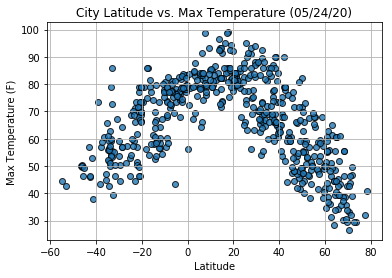

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

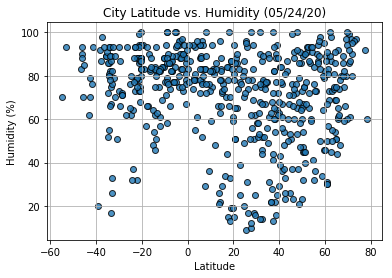

In [13]:
 # Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

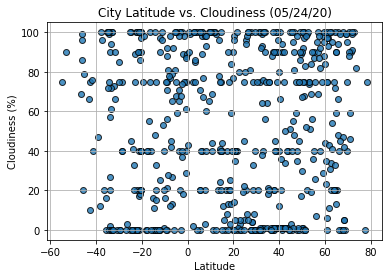

In [14]:
 # Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

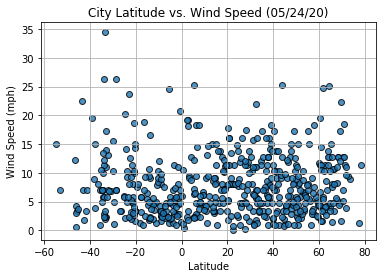

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print("The r-squared is: "+ str(rvalue))
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8016286749442981


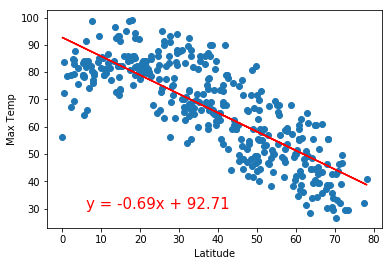

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6927078529690017


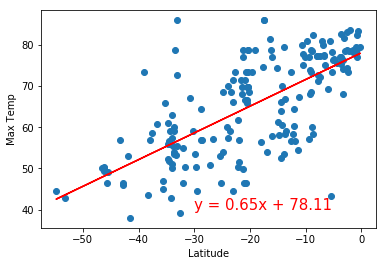

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03652246040191952


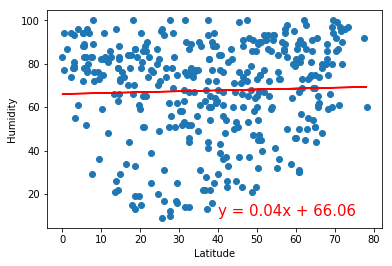

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1677009605152877


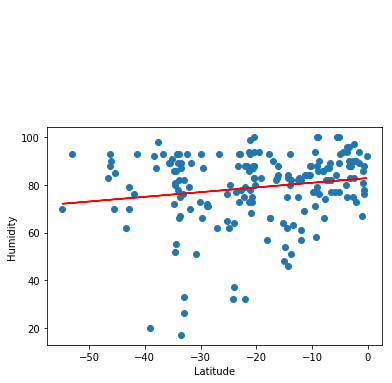

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06550864045470502


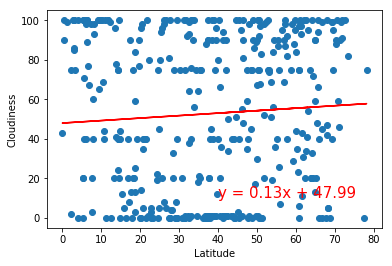

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.00022802274365726278


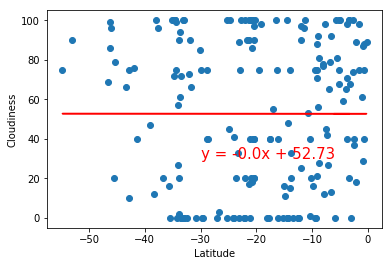

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025773070859236826


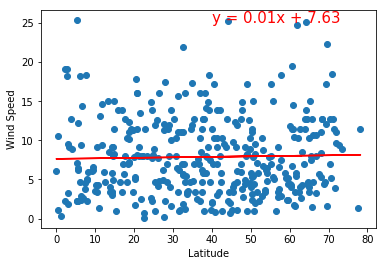

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23059645216126695


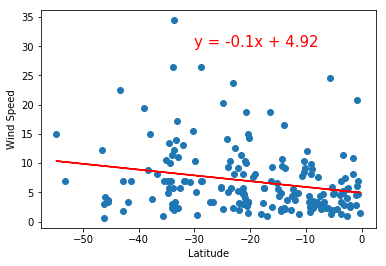

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))